# Actor Critic Agent in Pendulum Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rlforge.environments import Pendulum
from rlforge.agents.policy_gradient import SoftmaxActorCriticAgent, GaussianActorCriticAgent
from rlforge.experiments import ExperimentRunner

## **Discrete Pendulum Environment with Softmax Actor-Critic Agent**

In [2]:
env = Pendulum()
agent = SoftmaxActorCriticAgent(actor_step_size=2**(-2)/32,
                                critic_step_size=2/32,
                                avg_reward_step_size=2**(-6),
                                num_actions=env.num_actions,
                                dims_ranges=((-np.pi,np.pi),(-2*np.pi,2*np.pi)),
                                temperature=1,
                                iht_size=4096,
                                num_tilings=32,
                                num_tiles=8,
                                wrap_dims=(True, False))

In [3]:
runner = ExperimentRunner(env, agent)

# Run continuous experiment
results = runner.run_continuous(
    num_runs=10,
    num_steps=20000
)

rewards = results["rewards"]

runner.summary(last_n=20)

 Experiment Summary (Continuous)
Runs: 10
Average runtime per run: 2.474 seconds
Steps per run: 20000
First step mean reward: -3.140
Last step mean reward: -0.017
Overall mean reward: -0.282
Mean reward (last 20 steps): -0.014


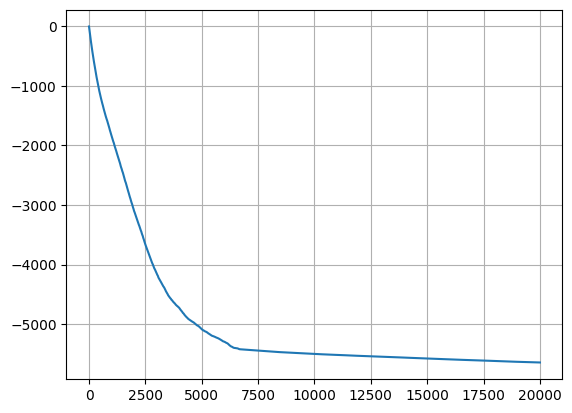

In [4]:
plt.plot(np.mean(np.cumsum(rewards,axis=0), axis=1))
plt.grid()

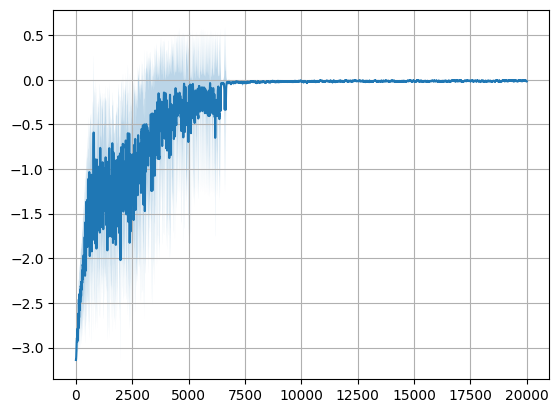

In [5]:
runs_std = np.std(rewards, axis=1)
runs_mean = np.mean(rewards, axis=1)
lower_bound = runs_mean - runs_std
upper_bound = runs_mean + runs_std
plt.plot(runs_mean)
plt.fill_between(np.arange(len(runs_mean)), lower_bound, upper_bound, alpha=0.3)
plt.grid()

## **Continuous Pendulum Environment with GAussian Actor-Critic Agent**

In [6]:
env = Pendulum(continuous=True)
agent = GaussianActorCriticAgent(actor_step_size=0.01/32,
                                 critic_step_size=2/32,
                                 avg_reward_step_size=2**(-6),
                                 dims_ranges=((-np.pi,np.pi),(-2*np.pi,2*np.pi)),
                                 iht_size=4096,
                                 num_tilings=32,
                                 num_tiles=8,
                                 wrap_dims=(True, False))

In [7]:
runner = ExperimentRunner(env, agent)

# Run continuous experiment
results = runner.run_continuous(
    num_runs=10,
    num_steps=20000
)

rewards = results["rewards"]

runner.summary(last_n=20)

 Experiment Summary (Continuous)
Runs: 10
Average runtime per run: 1.579 seconds
Steps per run: 20000
First step mean reward: -3.141
Last step mean reward: -0.022
Overall mean reward: -0.603
Mean reward (last 20 steps): -0.022


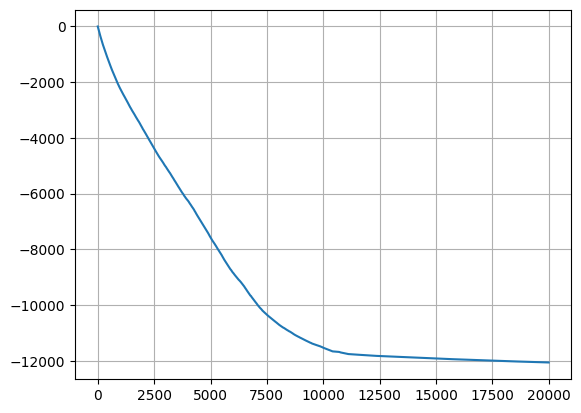

In [8]:
plt.plot(np.mean(np.cumsum(rewards,axis=0), axis=1))
plt.grid()

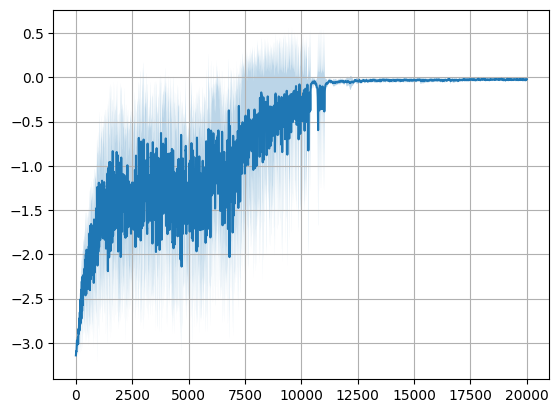

In [9]:
runs_std = np.std(rewards, axis=1)
runs_mean = np.mean(rewards, axis=1)
lower_bound = runs_mean - runs_std
upper_bound = runs_mean + runs_std
plt.plot(runs_mean)
plt.fill_between(np.arange(len(runs_mean)), lower_bound, upper_bound, alpha=0.3)
plt.grid()